# VO7 Integration mit Gitterverfahren

In [1]:
import numpy as np
import random

import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

## Helper functions

In [2]:
def x_squared(x):
    return x**2-10


def x_cube(x, diff=0):
    if(diff == 2):
        return 6*x+2
    elif(diff == 1):
        return 3*x**2+2*x-15
    else:
        return x**3+x**2-15*x
    
    
def x_5(x, diff=0):
    if(diff == 4):
        return 120*x/100-24/30
    elif(diff == 3):
        return 60*x**2/100-24*x/30+6
    elif(diff == 2):
        return 20*x**3/100-12*x**2/30+6*x+2
    elif(diff == 1):
        return 5*x**4/100-4*x**3/30+3*x**2+2*x-15
    else:
        return x**5/100-x**4/30+x**3+x**2-15*x

In [3]:
def plot_interval(y, x=[], line=True, start_lim = 0, interval = -1):
    if(interval == -1):
        end_lim = -1
    else:
        end_lim = start_lim + interval
    if(len(x) == 0):
        if(line):
            plt.plot(np.arange(len(y[start_lim:end_lim])), y[start_lim:end_lim])
        else:
            plt.scatter(np.arange(len(y[start_lim:end_lim])), y[start_lim:end_lim])
    else:
        if(line):
            plt.plot(x[start_lim:end_lim], y[start_lim:end_lim])
        else:
            plt.scatter(x[start_lim:end_lim], y[start_lim:end_lim])
    plt.show()

In [4]:
length = 1000

x = np.arange(length)/100-5#.01234
print(min(x), max(x))
delta_x = np.mean(x[1:]-x[:-1])
print("delta_x: %f" % delta_x)

f = x_squared(x)

-5.0 4.99
delta_x: 0.010000


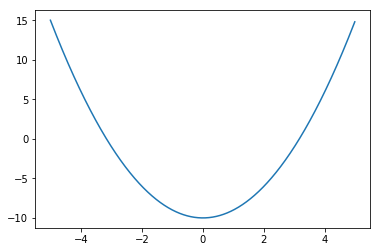

In [5]:
plot_interval(f, x)

## Explizites Euler-Verfahren

In [6]:
y = 0
for i in range(length):
    y = y + delta_x*x_squared(x[i])

print(y)

-16.6665


In [7]:
y = []
for i in range(length):
    y.append(delta_x*x_squared(x[i]))

print(sum(y))

-16.6665


In [8]:
y = [0]
y1 = [0]
for i in range(length):
    # this proves the last element (-1) is the i-th element
    y.append(y[-1] + delta_x*x_squared(x[i]))
    y1.append(y1[i] + delta_x*x_squared(x[i]))

print(y[-1])
print(y1[-1])

-16.6665
-16.6665


## Verfahren von Heun (Trapezregel)

In [9]:
y = 0
for i in range(length):
    y = y + delta_x*(x_squared(x[i])+x_squared(x[i+-1]))/2

print(y)

-16.6665


## Modifiziertes Euler-Verfahren (Mittelpunktsregel)

In [10]:
y = 0
for i in range(length):
    y = y + delta_x*x_squared(x[i]+delta_x/2)

print(y)

-16.66675


##  Runge-Kutta-Verfahren vierter Ordnung (RK4)

In [11]:
# with two vars

# def runga_kutta(func, curr_r, curr_v, g, m_s, delta_t):
#     k1_r = curr_v
#     k1_v = func(curr_r, g, m_s)
#     k2_r = curr_v + k1_v*delta_t/2
#     k2_v = func(curr_r + k1_r*delta_t/2, g, m_s)
#     k3_r = curr_v + k2_v*delta_t/2
#     k3_v = func(curr_r + k2_r*delta_t/2, g, m_s)
#     k4_r = curr_v + k3_v*delta_t
#     k4_v = func(curr_r + k3_r*delta_t, g, m_s)

#     phi_r = (k1_r + 2*k2_r + 2*k3_r + k4_r)/6
#     phi_v = (k1_v + 2*k2_v + 2*k3_v + k4_v)/6
#     return phi_r, phi_v

# for i in range(length):
#     phi_r, phi_v = runga_kutta(calculate_force, r[i], v[i], g, m_s, delta_t)
#     r = np.vstack((r, [r[i] + phi_r*delta_t]))
#     v = np.vstack((v, [v[i] + phi_v*delta_t]))


def runga_kutta(curr_x):
    k1 = x_squared(curr_x)
    k2 = x_squared(curr_x + delta_x/2)
    k3 = x_squared(curr_x + delta_x/2)
    k4 = x_squared(curr_x)
    
    return (k1 + 2*k2 + 2*k3 + k4)/6

y = 0
for i in range(length):
    y = y + delta_x*runga_kutta(x[i])

print(y)

-16.6666666667


## Leapfrog-Verfahren

In [12]:
y = [0, 2*delta_x*x_squared(x[0])]
for i in range(1,length-1):
    y.append(y[i-1] + 2*delta_x*x_squared(x[i]))

print(y[-1])

-16.666


## Implizites Euler-Verfahren

In [13]:
y = 0
for i in range(-1,length-1):
    y = y + delta_x*x_squared(x[i+1])

print(y)

-16.6665


## Implizites Verfahren (zweite Ordnung)

In [14]:
y = 0
for i in range(-1,length-1):
    y = y + delta_x*(x_squared(x[i])+x_squared(x[i+1]))/2

print(y)

-16.6665


## Konsistenz

In [15]:
# difference between base func and numerical derivative of approximated integral
y = [0]
for i in range(length):
    y.append(y[i] + delta_x*runga_kutta(x[i]))

# print(y[-1])

kons = []
for i in range(2):
    kons.append((y[i+1]-y[i])/delta_x-f[i])
    
print("np.mean(kons): %f10" % np.mean(kons))
print("min(kons):     %f10" % min(kons))
print("max(kons):     %f10" % max(kons))
print("delta_x):      %f10" % delta_x)

np.mean(kons): -0.03328310
min(kons):     -0.03331710
max(kons):     -0.03325010
delta_x):      0.01000010


## Konvergenz

In [16]:
solution = -50/3

In [17]:
# with smaller delta x error between approximation and exact solution should get smaller
for j in range(1,6):
    length = 10**j
    x = np.arange(length)*10/length-5#.01234
    delta_x = np.mean(x[1:]-x[:-1])
#     print(length, min(x), max(x), delta_x)
    
    y = 0
    for i in range(length):
        y = y + delta_x*x_squared(x[i])
        
    print("y at delta_x %f10: %f10, error: %f10" % (delta_x, y, solution-y))

y at delta_x 1.00000010: -15.00000010, error: -1.66666710
y at delta_x 0.10000010: -16.65000010, error: -0.01666710
y at delta_x 0.01000010: -16.66650010, error: -0.00016710
y at delta_x 0.00100010: -16.66666510, error: -0.00000210
y at delta_x 0.00010010: -16.66666710, error: -0.00000010


## Stabilität

In [18]:
length = 1000

x = np.arange(length)/100-5
print(min(x), max(x))
delta_x = np.mean(x[1:]-x[:-1])
print("delta_x: %f" % delta_x)

f = x_squared(x)

-5.0 4.99
delta_x: 0.010000


In [19]:
y = [0]
for i in range(length):
    y.append(y[i] + delta_x*runga_kutta(x[i]))

print(y[-1])

-16.6666666667


In [20]:
g = []
for i in range(length):
    if(y[i] != 0):
        g.append(abs(1 + (y[i+1]-y[i])*delta_x/y[i]))

In [21]:
print("np.mean(g): %f10" % np.mean(g))
print("min(g):     %f10" % min(g))
print("max(g):     %f10" % max(g))
print("delta_x):   %f10" % delta_x)

np.mean(g): 0.99967010
min(g):     0.61653110
max(g):     1.01028610
delta_x):   0.01000010


# Hands On

## Infinity DGL

In [22]:
import re, seaborn as sns
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

In [23]:
def infinity_dlg (r, a):
    return [
        a[0]*(r[1]-r[0]),
        r[0]*(a[1]-r[2])-r[1],
        r[0]*r[1]-a[2]*r[2]
    ]

# Parameters
length = 2000
delta_t = 0.01
a = np.array([10, 28, 8/3])

# Start values
r = np.array([20, 20, 40])

func = np.array([r])
for i in range(length):
#     if(i % 100 == 0):
#         print(func[i], infinity_dlg(func[i], a))
    func = np.vstack((func, [func[i] + np.multiply(
        infinity_dlg(func[i], a), delta_t)]))

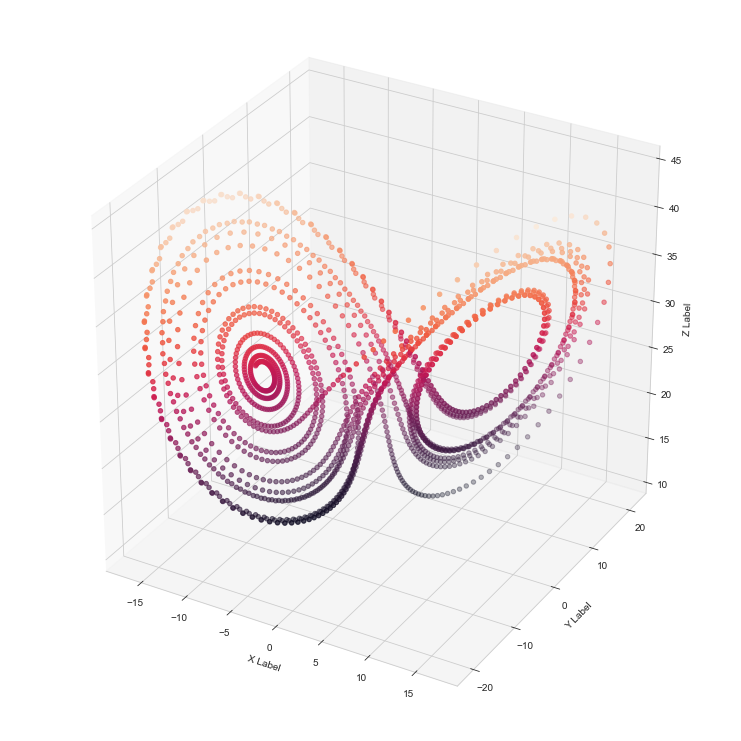

In [24]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig) # Method 1

start_plot_index = 100
ax.scatter(func[start_plot_index:,0],
           func[start_plot_index:,1],
           func[start_plot_index:,2],
           c=func[start_plot_index:,2],
           marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [25]:
# OLD VERSION

def func_x(x, y, z):
    return 10*(y-x)

def func_y(x, y, z):
    return x*(28-z)-y

def func_z(x, y, z):
    return x*y-8/3*z

# Parameters
length = 2000
delta_t = 0.01

# Start values
x_res = [20]
y_res = [20]
z_res = [40]

for i in range(length):
    x_res.append(x_res[i] + delta_t*func_x(x_res[i], y_res[i], z_res[i]))
    y_res.append(y_res[i] + delta_t*func_y(x_res[i], y_res[i], z_res[i]))
    z_res.append(z_res[i] + delta_t*func_z(x_res[i], y_res[i], z_res[i]))

# fig = plt.figure(figsize=(10,10))
# ax = Axes3D(fig) # Method 1

# start_plot_index = 100
# ax.scatter(x_res[start_plot_index:],
#            y_res[start_plot_index:],
#            z_res[start_plot_index:],
#            c=x_res[start_plot_index:],
#            marker='o')
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()

## Anwendung: Bewegungsgleichung

In [26]:
# Constants

m_e_kg = 5.972*10**24 # kg
m_s_kg = 1.989*10**30 # kg
r_e_m = 1.4959*10**11 # m
g_si = 6.67408*10**-11

print("m_e_kg: %.4g" % m_e_kg)
print("m_e_kg: %.4g" % m_s_kg)
print("r_e_m: %.4g" % r_e_m)
print("g_si: %.4g" % g_si)
print("")

m_s = 332948#m_s_kg/m_e_kg
m_e = 1
r_e_au = 1 # AU
day_in_sec = 60*60*24
g = 8.88744*10**-10 #g_si/r_e_m**3*(m_e_kg*day_in_sec**2)

print("m_e: %.4g" % m_e)
print("m_s: %.4g" % m_s)
print("r_e_au: %.4g" % r_e_au)
print("g: %.4g" % g)
print("")

delta_t = 1#0.1
print("delta_t: %.4g" % delta_t)

m_e_kg: 5.972e+24
m_e_kg: 1.989e+30
r_e_m: 1.496e+11
g_si: 6.674e-11

m_e: 1
m_s: 3.329e+05
r_e_au: 1
g: 8.887e-10

delta_t: 1


In [27]:
def plot_orbit(r, v, title_text, body_1="Earth", body_2="Spaceship"):    
    # color based on velocity
    colors = np.sqrt(v[:,0]**2 + v[:,1]**2)
    print("max v: %f, min v: %f" % (max(colors), min(colors)))
    # norm colors between 0,1
    colors = (colors-min(colors))/(max(colors)-min(colors))

    plt.figure(figsize=(8,8))
    plt.title(title_text)
    plt.scatter(r[:,0], r[:,1], marker='.', c=colors)
    plt.scatter(r[-1,0], r[-1,1], marker='o')
    plt.text(r[-1,0], r[-1,1], "  %s" % body_2)
    plt.plot(0, 0, marker='X')
    plt.text(0, 0, "  %s" % body_1)
    plt.show()
    plt.close()

In [28]:
def get_total_energy(r,v):
    total_energy = []
    for i in range(len(r)):
        abs_v_squared = v[i][0]**2 + v[i][1]**2
        abs_r = np.sqrt(r[i][0]**2 + r[i][1]**2)
        total_energy.append(abs_v_squared/2 - g*m_s/abs_r)
    return total_energy

### Earth orbit using Explicit-Euler

max v: 0.017367, min v: 0.016789


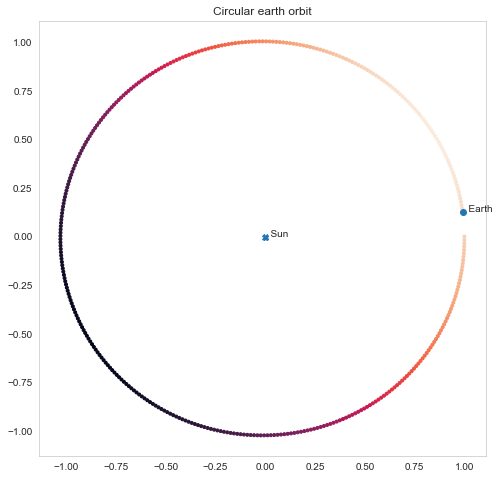

In [29]:
def calculate_force(curr_r, g, m_s):
    absr = np.sqrt(curr_r[0]**2 + curr_r[1]**2)
    F = -g*m_s*curr_r/absr**3
    return F

# Start Values
r = np.array([[1, 0]])
v = np.array([[0, -0.017326]])

length = int(366/delta_t)
for i in range(length):
    r = np.vstack((r, [r[i] + np.multiply(v[i], delta_t)]))
    v = np.vstack((v, [v[i] + np.multiply(
        calculate_force(r[i+1], g, m_s), delta_t)]))

plot_orbit(r, v, "Circular earth orbit", 
           body_1="Sun", body_2="Earth")

r_euler = r
v_euler = v

### Hohmann-Transfer-orbit using Explicit Euler

In [30]:
def calculate_force(curr_r, g, m_s):
    absr = np.sqrt(curr_r[0]**2 + curr_r[1]**2)
    F = -g*m_s*curr_r/absr**3
    return F

# transfer orbit
delta_t
v_shift = 0
for i in tqdm(range(1000)):
    v_shift -= 0.00005

    # Start Values
    r = np.array([[1, 0]])
    v = np.array([[0, -0.017326+v_shift]])

    length = int(600/delta_t)
    for i in range(length):
        r = np.vstack((r, [r[i] + np.multiply(v[i], delta_t)]))
        v = np.vstack((v, [v[i] + np.multiply(
            calculate_force(r[i+1], g, m_s), delta_t)]))

    if((np.min(r) + 1.5) < 0.001):
        print("Transfer orbit starting velocity: %s" % str(v[0]))
        break

r_transfer = r


# Earth Orbit
# Start Values
r = np.array([[1, 0]])
v = np.array([[0, -0.017326]])

length = int(366/delta_t)
for i in range(length):
    r = np.vstack((r, [r[i] + np.multiply(v[i], delta_t)]))
    v = np.vstack((v, [v[i] + np.multiply(
        calculate_force(r[i+1],g, m_s), delta_t)]))
    
r_earth = r


# Mars Orbit
# Start Values
r = np.array([[1.5, 0]])
v = np.array([[0, -0.017326]])

delta_t
v_shift = 0
for i in tqdm(range(1000)):
    v_shift -= 0.00005

    # Start Values
    r = np.array([[1.5, 0]])
    v = np.array([[0, -0.010326+v_shift]])

    length = int(800/delta_t)
    for i in range(length):
        r = np.vstack((r, [r[i] + np.multiply(v[i], delta_t)]))
        v = np.vstack((v, [v[i] + np.multiply(
            calculate_force(r[i+1], g, m_s), delta_t)]))

    if((np.min(r[:,0]) + 1.5) < 0.001):
        print("Mars orbit starting velocity: %s" % str(v[0]))
        break

r_mars = r
        
# plot_orbit(r, v, "Circular earth orbit", 
#            body_1="Sun", body_2="Earth")

Transfer orbit starting velocity: [ 0.       -0.018876]



Mars orbit starting velocity: [ 0.       -0.014076]



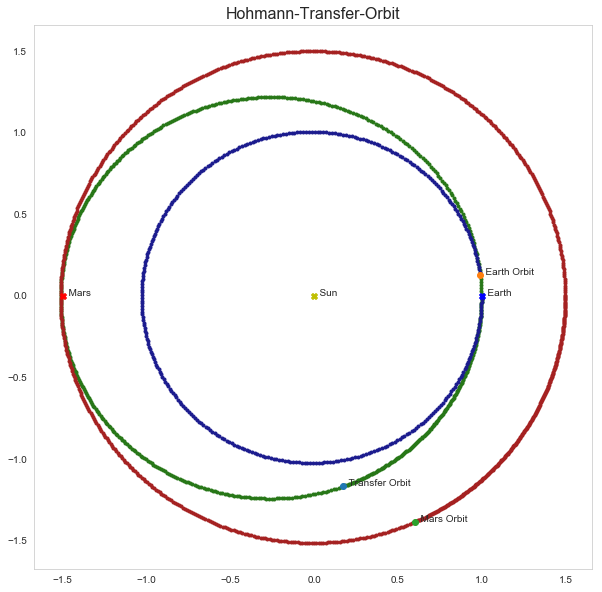

In [31]:
plt.figure(figsize=(10,10))
plt.title("Hohmann-Transfer-Orbit", fontsize=16)
plt.scatter(r_transfer[:,0], r_transfer[:,1], marker='.', c="#277717")
plt.scatter(r_transfer[-1,0], r_transfer[-1,1], marker='o')
plt.text(r_transfer[-1,0], r_transfer[-1,1], "  Transfer Orbit")

plt.scatter(r_earth[:,0], r_earth[:,1], marker='.', c="#1b1b8e")
plt.scatter(r_earth[-1,0], r_earth[-1,1], marker='o')
plt.text(r_earth[-1,0], r_earth[-1,1], "  Earth Orbit")

plt.scatter(r_mars[:,0], r_mars[:,1], marker='.', c="#a52121")
plt.scatter(r_mars[-1,0], r_mars[-1,1], marker='o')
plt.text(r_mars[-1,0], r_mars[-1,1], "  Mars Orbit")

plt.scatter(0, 0, marker='X', c="y")
plt.text(0, 0, "  Sun")
plt.scatter(1, 0, marker='X', c="b")
plt.text(1, 0, "  Earth")
plt.scatter(-1.5, 0, marker='X', c="r")
plt.text(-1.5, 0, "  Mars")

plt.show()
plt.close()

### Exit orbit using Explicit-Euler

In [32]:
# def calculate_force(curr_r, g, m_s):
#     absr = np.sqrt(curr_r[0]**2 + curr_r[1]**2)
#     F = -g*m_s*curr_r/absr**3
#     return F

# # Start Values
# # r = np.array([[1, 0]])
# # r = np.array([[1.7, 0.35]])
# # v = np.array([[0, -0.017326]])
# r = np.array([[-0.04257581,  0.05007129]])
# v = np.array([[0.1047533 , -0.00111174]])

# length = 1300
# for i in range(length):
#     r = np.vstack((r, [r[i] + np.multiply(v[i], delta_t)]))
#     v = np.vstack((v, [v[i] + np.multiply(
#         calculate_force(r[i+1], g, m_s), delta_t)]))

# plot_orbit(r, v, "Gravity assist to exit earths orbit")

### Orbit using Runga Kutta

In [38]:
def runga_kutta(func, curr_r, curr_v, g, m_s, delta_t):
    k1_v = func(curr_r, g, m_s)
    k1_r = curr_v
    k2_v = func(curr_r + k1_r*delta_t/2, g, m_s)
    k2_r = curr_v + k1_v*delta_t/2
    k3_v = func(curr_r + k2_r*delta_t/2, g, m_s)
    k3_r = curr_v + k2_v*delta_t/2
    k4_v = func(curr_r + k3_r*delta_t, g, m_s)
    k4_r = curr_v + k3_v*delta_t

    phi_r = (k1_r + 2*k2_r + 2*k3_r + k4_r)/6
    phi_v = (k1_v + 2*k2_v + 2*k3_v + k4_v)/6
    return phi_r, phi_v


def calculate_force(curr_r, g, m_s):
    absr = np.sqrt(curr_r[0]**2 + curr_r[1]**2)
    F = -g*m_s*curr_r/absr**3
    return F

max v: 0.017326, min v: 0.016831


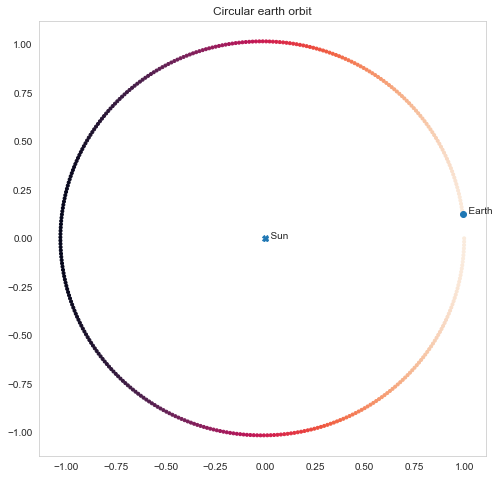

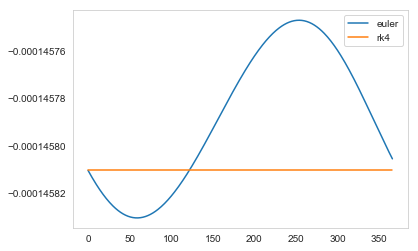

In [41]:
delta_t = 1#0.5

# Start Values
r = np.array([[1, 0]])
v = np.array([[0, -0.017326]])
# r = np.array([[-0.04257581,  0.05007129]])
# v = np.array([[0.1047533 , -0.00111174]])

length = int(366/delta_t)
for i in range(length):
    phi_r, phi_v = runga_kutta(calculate_force, r[i], v[i], g, m_s, delta_t)
    r = np.vstack((r, [r[i] + phi_r*delta_t]))
    v = np.vstack((v, [v[i] + phi_v*delta_t]))

plot_orbit(r, v, "Circular earth orbit", 
           body_1="Sun", body_2="Earth")

total_energy_euler = get_total_energy(r_euler, v_euler)
total_energy_rk4 = get_total_energy(r, v)
plt.plot(total_energy_euler, label="euler")
plt.plot(total_energy_rk4, label="rk4")
plt.legend()
plt.show()
plt.close()